
## Mamadou DIOUF


> Projet - Data - Analysis 2023





1. Consider the dataset from https://www.kaggle.com/datasets/crawford/20-newsgroups/
code, describing a collection of 18,000 documents from 20 different newsgroups.


It's already in sklearn.datasets.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import re
from nltk.corpus import stopwords
import string
import random
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import timeit
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from nltk.corpus import gutenberg, stopwords
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
dataset_full = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)
df_full = pd.DataFrame()
df_full['text'] = dataset_full.data
df_full['source'] = dataset_full.target
label=[]
for i in df_full['source']:
    label.append(dataset_full.target_names[i])
df_full['label']=label

dataset_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)
df_train = pd.DataFrame()
df_train['text'] = dataset_train.data
df_train['source'] = dataset_train.target
label=[]
for i in df_train['source']:
    label.append(dataset_train.target_names[i])
df_train['label']=label

dataset_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)
df_test = pd.DataFrame()
df_test['text'] = dataset_test.data
df_test['source'] = dataset_test.target
label=[]
for i in df_test['source']:
    label.append(dataset_test.target_names[i])
df_test['label']=label

In [ ]:
df_test['source'].shape

(7532,)

In [ ]:
df_full['text'][0]

(18846,)

In [ ]:
doc = np.random.choice(df_full['text'], size=1000, replace=False)

In [ ]:
len(doc)


1000

In [ ]:
concatenated_list = []
for i in range(1000):
  for j in doc[i].split():
    concatenated_list.append(j)

In [ ]:
df_train['label'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11314 entries, 0 to 11313
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
11314 non-null  object
dtypes: object(1)
memory usage: 88.5+ KB


In [ ]:
df_train['label'].value_counts()


rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: label, dtype: int64

#Data cleaning
* Removing stopwords

* Filter out short words

* Lowercase and removing everything except words

* Applying lemmatization to the text

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

stopWords = set(stopwords.words('english'))

def textcleaner_lemmas(text):
    ''' Takes in raw unformatted text and strips punctuation, removes whitespace,
    strips numbers, tokenizes and stems.
    Returns string of processed text to be used into CountVectorizer
    '''
    # Lowercase and strip everything except words
    cleaner = re.sub(r"[^a-zA-Z ]+", ' ', text.lower())
    # Tokenize
    cleaner = word_tokenize(cleaner)
    ps = PorterStemmer()
    clean = []
    for w in cleaner:
        # filter out stopwords
        if w not in stopWords:
            # filter out short words
            if len(w)>2:
                # lemmatizer
                clean.append(lemmatizer.lemmatize(w))
    return ' '.join(clean)

In [ ]:
df_full['clean_text_lemma'] = df_full.text.apply(lambda x: textcleaner_lemmas(x))
df_train['clean_text_lemma'] = df_train.text.apply(lambda x: textcleaner_lemmas(x))
df_test['clean_text_lemma'] = df_test.text.apply(lambda x: textcleaner_lemmas(x))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Assume you have a list of 1000 documents called 'documents'
# Convert the documents to a matrix of TF-IDF features
tfidf = TfidfVectorizer()
doc_matrix = tfidf.fit_transform(doc)
print(doc_matrix)
# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(doc_matrix)


  (0, 17479)	0.11409652303663159
  (0, 19546)	0.21901500652998526
  (0, 1264)	0.16669471145481066
  (0, 18129)	0.24228990964064007
  (0, 6346)	0.24228990964064007
  (0, 2013)	0.24228990964064007
  (0, 14795)	0.1794374368447422
  (0, 10955)	0.1243771745827998
  (0, 13458)	0.11126717973296396
  (0, 1982)	0.15747950987447357
  (0, 11797)	0.10682580820375519
  (0, 2606)	0.06274159264515797
  (0, 19324)	0.24228990964064007
  (0, 9346)	0.12539478540633153
  (0, 1897)	0.16306540046391793
  (0, 10900)	0.17694899583252946
  (0, 7746)	0.1392690263328425
  (0, 18064)	0.16497235509157462
  (0, 8342)	0.20540006100233402
  (0, 7747)	0.24228990964064007
  (0, 12237)	0.2115221613128842
  (0, 9175)	0.048914123703673686
  (0, 18435)	0.1105955855999976
  (0, 5794)	0.19178511547468277
  (0, 10421)	0.21901500652998526
  :	:
  (999, 13379)	0.2284168080375608
  (999, 6985)	0.251923705323592
  (999, 8570)	0.2284168080375608
  (999, 17417)	0.19089331637298132
  (999, 4225)	0.16405180291766244
  (999, 6989)	0.1

In [ ]:
pd.DataFrame(similarity_matrix)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.028149,0.007877,0.081008,0.069515,0.025607,0.044171,0.034753,0.013832,0.019201,...,0.049532,0.046685,0.062187,0.005157,0.034117,0.024495,0.0,0.038610,0.016743,0.052368
1,0.028149,1.000000,0.005029,0.062056,0.038126,0.006588,0.054682,0.028435,0.010714,0.017960,...,0.029050,0.031666,0.054988,0.032336,0.063758,0.039772,0.0,0.025797,0.028853,0.015055
2,0.007877,0.005029,1.000000,0.013172,0.020738,0.003410,0.027404,0.028939,0.011186,0.018838,...,0.015866,0.029004,0.044894,0.013702,0.012961,0.018179,0.0,0.015425,0.009331,0.012896
3,0.081008,0.062056,0.013172,1.000000,0.058579,0.078782,0.095464,0.072405,0.078773,0.038270,...,0.088375,0.103181,0.057653,0.014364,0.044914,0.033534,0.0,0.112211,0.025941,0.103594
4,0.069515,0.038126,0.020738,0.058579,1.000000,0.026496,0.070170,0.084226,0.023320,0.078092,...,0.065025,0.087993,0.088985,0.022009,0.057478,0.067655,0.0,0.052912,0.017639,0.094306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.024495,0.039772,0.018179,0.033534,0.067655,0.025246,0.056872,0.079136,0.035260,0.032867,...,0.050841,0.075327,0.050609,0.019028,0.026209,1.000000,0.0,0.027211,0.024134,0.039473
996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
997,0.038610,0.025797,0.015425,0.112211,0.052912,0.039626,0.062836,0.055558,0.033127,0.027115,...,0.048897,0.091228,0.057092,0.003801,0.029507,0.027211,0.0,1.000000,0.016960,0.085145
998,0.016743,0.028853,0.009331,0.025941,0.017639,0.003614,0.020542,0.041512,0.005362,0.020468,...,0.019589,0.036086,0.025924,0.006797,0.014964,0.024134,0.0,0.016960,1.000000,0.010844


Exploring more ml algorithms: TruncatedSVD, TSNE, UMAP

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 72.8 MB/s eta 0:00:00


In [ ]:
df_train.head()

,text,source,label,clean_text_lemma
0,I was wondering if anyone out there could enli...,7,rec.autos,wondering anyone could enlighten car saw day d...
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware,fair number brave soul upgraded clock oscillat...
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware,well folk mac plus finally gave ghost weekend ...
3,\nDo you have Weitek's address/phone number? ...,1,comp.graphics,weitek address phone number like get informati...
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space,article owcb world std com tombaker world std ...


In [ ]:
df_full['label'].describe()

count                18846
unique                  20
top       rec.sport.hockey
freq                   999
Name: label, dtype: object

In [ ]:
df_full['label'].value_counts()

rec.sport.hockey            999
soc.religion.christian      997
rec.motorcycles             996
rec.sport.baseball          994
sci.crypt                   991
rec.autos                   990
sci.med                     990
comp.windows.x              988
sci.space                   987
comp.os.ms-windows.misc     985
sci.electronics             984
comp.sys.ibm.pc.hardware    982
misc.forsale                975
comp.graphics               973
comp.sys.mac.hardware       963
talk.politics.mideast       940
talk.politics.guns          910
alt.atheism                 799
talk.politics.misc          775
talk.religion.misc          628
Name: label, dtype: int64

In [ ]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')

# Convert the text documents to a tf-idf matrix
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)

# Use k-medoids to cluster the documents into 20 classes
k = 20
kmedoids = KMedoids(n_clusters=k)
labels = kmedoids.fit_predict(X)

# Print the cluster labels and their sizes
for i in range(k):
    print(f"Cluster {i}: {np.sum(labels == i)} documents")

Cluster 0: 927 documents
Cluster 1: 566 documents
Cluster 2: 690 documents
Cluster 3: 362 documents
Cluster 4: 81 documents
Cluster 5: 1492 documents
Cluster 6: 830 documents
Cluster 7: 283 documents
Cluster 8: 692 documents
Cluster 9: 306 documents
Cluster 10: 1794 documents
Cluster 11: 671 documents
Cluster 12: 416 documents
Cluster 13: 669 documents
Cluster 14: 4651 documents
Cluster 15: 824 documents
Cluster 16: 2020 documents
Cluster 17: 860 documents
Cluster 18: 491 documents
Cluster 19: 221 documents


In [ ]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')

# Convert the text documents to a tf-idf matrix
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)

# Use k-medoids to cluster the documents into 20 classes
k = 20
kmedoids = KMedoids(n_clusters=k,init="build")
labels = kmedoids.fit_predict(X)

# Print the cluster labels and their sizes
for i in range(k):
    print(f"Cluster {i}: {np.sum(labels == i)} documents")

Cluster 0: 4047 documents
Cluster 1: 2175 documents
Cluster 2: 1561 documents
Cluster 3: 1080 documents
Cluster 4: 1586 documents
Cluster 5: 910 documents
Cluster 6: 2184 documents
Cluster 7: 528 documents
Cluster 8: 309 documents
Cluster 9: 534 documents
Cluster 10: 253 documents
Cluster 11: 498 documents
Cluster 12: 310 documents
Cluster 13: 317 documents
Cluster 14: 379 documents
Cluster 15: 275 documents
Cluster 16: 757 documents
Cluster 17: 333 documents
Cluster 18: 432 documents
Cluster 19: 378 documents


In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=8c5619a5d91fdccd95b0704d8e2a8d5097adba3b399a90d2e95250074ea41976
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=26c6290762b6602e1cff4e7e83f5d0e0cb2806b249b65dc72ff18a0d946868e0
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import umap


# Vectorize the documents using TF-IDF
vectorizer = TfidfVectorizer(min_df=6, strip_accents='ascii', analyzer='word', lowercase=True)

x_train_lemma = vectorizer.fit_transform(df_train['clean_text_lemma'])

# Perform SVD (Latent Semantic Analysis)
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(x_train_lemma)

# Perform t-SNE
tsne = TSNE(n_components=2,perplexity=200)
X_tsne = tsne.fit_transform(X_svd)

# Perform UMAP
umap_embed = umap.UMAP(n_components=2,n_neighbors=20).fit_transform(X_svd)

# Print the results
print('SVD (Latent Semantic Analysis) embeddings:')
print(X_svd)
print('t-SNE embeddings:')
print(X_tsne)
print('UMAP embeddings:')
print(umap_embed)


SVD (Latent Semantic Analysis) embeddings:
[[ 0.16080006  0.02574558]
 [ 0.10633084  0.0875051 ]
 [ 0.25089954  0.05708355]
 ...
 [ 0.05613143  0.02663568]
 [ 0.08856774 -0.03819001]
 [ 0.05958699  0.01091224]]
t-SNE embeddings:
[[  7.2697763  16.030529 ]
 [ 29.124714    4.801201 ]
 [ 16.156599   25.20296  ]
 ...
 [ 15.9765835 -20.162874 ]
 [-21.325623  -14.111064 ]
 [  9.399592  -23.369026 ]]
UMAP embeddings:
[[-4.037408   7.4408917]
 [ 1.8969628 12.850347 ]
 [-5.477931  10.390812 ]
 ...
 [ 7.1326656  6.8859196]
 [ 2.9952157 -4.216646 ]
 [ 7.4087214  4.7917113]]


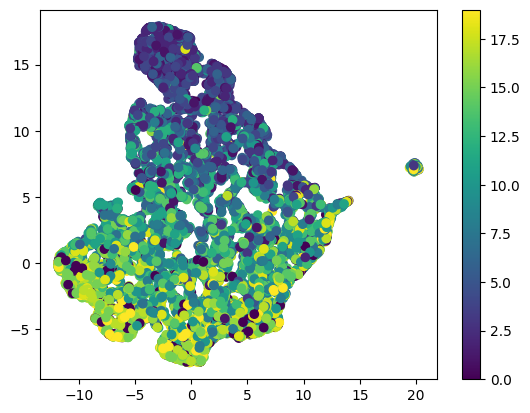

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(umap_embed[:, 0], umap_embed[:, 1],c=df_train['source'],cmap='viridis')
plt.colorbar()
plt.show()

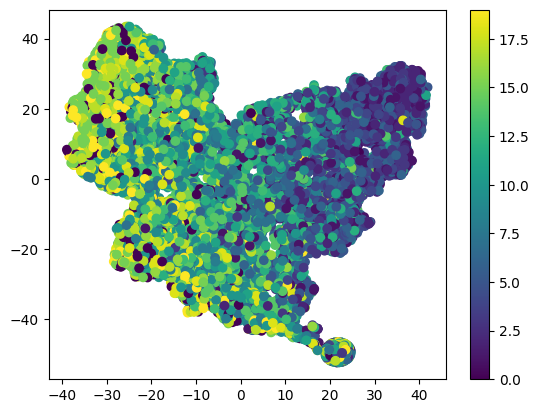

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=df_train['source'],cmap='viridis')
plt.colorbar()
plt.show()

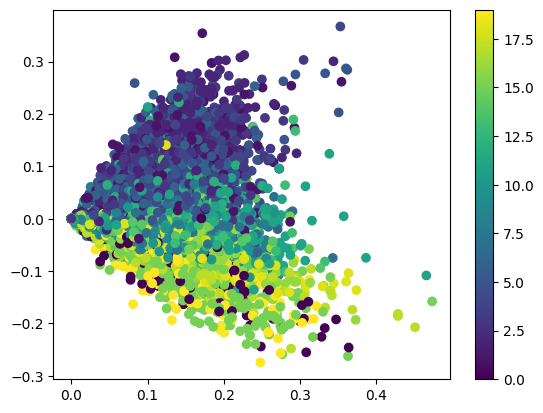

In [ ]:
plt.scatter(X_svd[:, 0], X_svd[:, 1],c=df_train['source'],cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:

# Vectorize the documents using TF-IDF
vectorizer = TfidfVectorizer(min_df=6, strip_accents='ascii', analyzer='word', lowercase=True)

x_train_lemma = vectorizer.fit_transform(df_train['clean_text_lemma'])

# Perform SVD (Latent Semantic Analysis)
svd = TruncatedSVD(n_components=3)
X_svd = svd.fit_transform(x_train_lemma)

# Perform t-SNE
tsne = TSNE(n_components=3,perplexity=200)
X_tsne = tsne.fit_transform(X_svd)

# Perform UMAP
umap_embed = umap.UMAP(n_components=3,n_neighbors=20).fit_transform(X_svd)

# Print the results
print('SVD (Latent Semantic Analysis) embeddings:')
print(X_svd)
print('t-SNE embeddings:')
print(X_tsne)
print('UMAP embeddings:')
print(umap_embed)


SVD (Latent Semantic Analysis) embeddings:
[[ 0.16080202  0.02537222 -0.07522156]
 [ 0.10633021  0.08725912 -0.05115261]
 [ 0.25089944  0.05745598 -0.03348152]
 ...
 [ 0.05613171  0.02687653 -0.03921443]
 [ 0.08856877 -0.03807455  0.01456813]
 [ 0.05958745  0.01092676 -0.02345961]]
t-SNE embeddings:
[[ 1.4511522   0.9904586   5.02154   ]
 [ 5.7883973  -0.26010504  2.8550317 ]
 [ 2.551079    4.453122    4.540918  ]
 ...
 [ 3.842806   -4.3587995  -0.18175508]
 [-5.158298   -1.2340741  -3.5741951 ]
 [ 2.1912892  -5.1947007  -1.9200151 ]]
UMAP embeddings:
[[-1.4787023   3.831302    5.561218  ]
 [-1.1111332   1.0809768   4.4423265 ]
 [-0.8716286   3.7524793   6.9980345 ]
 ...
 [-0.4903835   2.295118    1.4888188 ]
 [ 1.5283746   8.066845    1.8405894 ]
 [ 0.22204776  3.5235786  -0.16029486]]


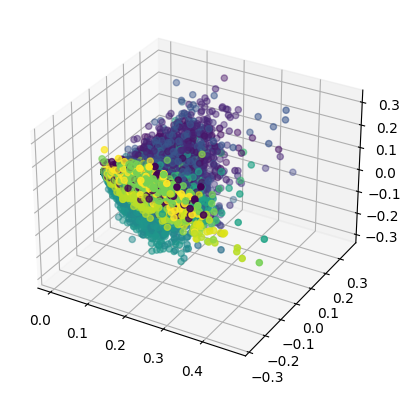

In [ ]:
# Plot the UMAP embedding in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_svd[:, 0], X_svd[:, 1], X_svd[:, 2],c=df_train['source'],cmap='viridis')
plt.show()

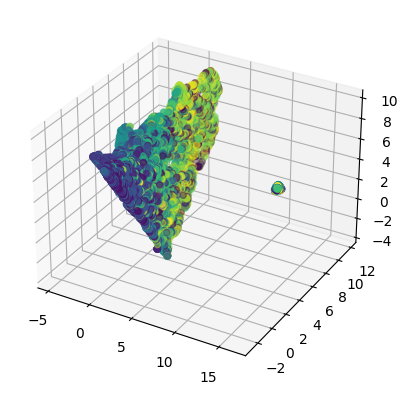

In [ ]:

# Plot the UMAP embedding in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(umap_embed[:, 0], umap_embed[:, 1], umap_embed[:, 2],c=df_train['source'],cmap='viridis')
plt.show()

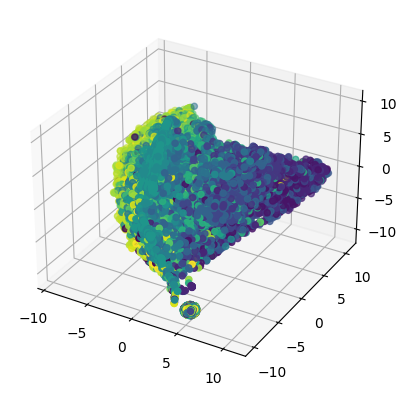

In [ ]:

# Plot the UMAP embedding in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2],c=df_train['source'],cmap='viridis')
plt.show()

In [ ]:
df_train['label'].value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: label, dtype: int64

In [ ]:
from sklearn_extra.cluster import KMedoids
import numpy as np



# Use k-medoids to cluster the documents into 20 classes
k = 20
kmedoids = KMedoids(n_clusters=k,init= 'build',)
labels = kmedoids.fit_predict(X_svd)

# Print the cluster labels and their sizes
for i in range(k):
    print(f"Cluster {i}: {np.sum(labels == i)} documents")

Cluster 0: 815 documents
Cluster 1: 535 documents
Cluster 2: 682 documents
Cluster 3: 1003 documents
Cluster 4: 535 documents
Cluster 5: 450 documents
Cluster 6: 298 documents
Cluster 7: 293 documents
Cluster 8: 837 documents
Cluster 9: 765 documents
Cluster 10: 638 documents
Cluster 11: 553 documents
Cluster 12: 318 documents
Cluster 13: 767 documents
Cluster 14: 561 documents
Cluster 15: 270 documents
Cluster 16: 746 documents
Cluster 17: 444 documents
Cluster 18: 647 documents
Cluster 19: 157 documents


In [ ]:

# Use k-medoids to cluster the documents into 20 classes
k = 20
kmedoids = KMedoids(n_clusters=k,init= 'build',)
labels = kmedoids.fit_predict(X_tsne)

# Print the cluster labels and their sizes
for i in range(k):
    print(f"Cluster {i}: {np.sum(labels == i)} documents")

Cluster 0: 646 documents
Cluster 1: 525 documents
Cluster 2: 740 documents
Cluster 3: 556 documents
Cluster 4: 617 documents
Cluster 5: 626 documents
Cluster 6: 421 documents
Cluster 7: 811 documents
Cluster 8: 715 documents
Cluster 9: 713 documents
Cluster 10: 399 documents
Cluster 11: 493 documents
Cluster 12: 663 documents
Cluster 13: 618 documents
Cluster 14: 371 documents
Cluster 15: 581 documents
Cluster 16: 482 documents
Cluster 17: 481 documents
Cluster 18: 486 documents
Cluster 19: 370 documents


In [ ]:
# use k-medoids to cluster the documents into 20 classes
k = 20
kmedoids = KMedoids(n_clusters=k,init= 'build',)
labels = kmedoids.fit_predict(umap_embed)

# Print the cluster labels and their sizes
for i in range(k):
    print(f"Cluster {i}: {np.sum(labels == i)} documents")

Cluster 0: 518 documents
Cluster 1: 534 documents
Cluster 2: 549 documents
Cluster 3: 853 documents
Cluster 4: 333 documents
Cluster 5: 661 documents
Cluster 6: 687 documents
Cluster 7: 417 documents
Cluster 8: 449 documents
Cluster 9: 744 documents
Cluster 10: 646 documents
Cluster 11: 558 documents
Cluster 12: 518 documents
Cluster 13: 649 documents
Cluster 14: 718 documents
Cluster 15: 456 documents
Cluster 16: 393 documents
Cluster 17: 572 documents
Cluster 18: 481 documents
Cluster 19: 578 documents


In [ ]:
sentences=df_train['clean_text_lemma']
corpus= [[word.lower() for word in sentence.split() if word.isalpha()] for sentence in sentences]

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=5, workers=4)


In [ ]:
model.wv.vectors.shape

(17166, 100)

In [ ]:
model.wv.vectors

array([[-7.2023237e-01,  4.6693158e-01,  7.8827024e-02, ...,
        -9.9624056e-01,  8.8725753e-02,  1.0524640e+00],
       [-3.9700231e-01,  5.6808293e-01, -1.8688527e-01, ...,
        -9.9969172e-01, -1.4341511e+00,  6.5369153e-01],
       [-8.1011516e-01,  3.1757128e-01,  3.7882027e-01, ...,
        -8.9422965e-01,  4.0198245e+00, -1.9500910e+00],
       ...,
       [-4.3980137e-02,  1.3722054e-02, -4.6507307e-04, ...,
         1.8516073e-02,  1.8027721e-02, -4.7355788e-03],
       [-9.3143461e-03,  4.6126831e-02,  1.4809896e-02, ...,
        -1.0270037e-01,  4.8742019e-02, -1.7747780e-02],
       [-1.0585608e-02,  1.2830420e-02, -1.8996270e-02, ...,
        -9.6660443e-03,  2.3575839e-02, -1.3102185e-02]], dtype=float32)

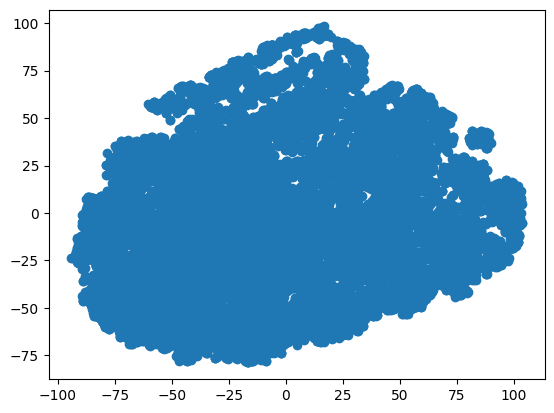

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2,perplexity=20)
tsne_results = tsne.fit_transform(model.wv.vectors)

plt.scatter(tsne_results[:,0], tsne_results[:,1])
plt.show()


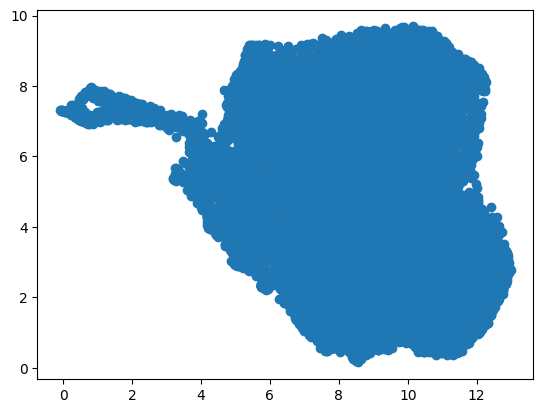

In [ ]:
import umap.umap_ as umap

umap_results = umap.UMAP(n_neighbors=20, min_dist=0.1, metric='cosine').fit_transform(model.wv.vectors)

plt.scatter(umap_results[:,0], umap_results[:,1])
plt.show()


In [ ]:
!pip install tensorboardX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.6 MB/s eta 0:00:00


In [ ]:
with open('/content/ptb.valid.txt', 'w') as f:
    for text in df_test['clean_text_lemma']:
        f.write(text + '\n')

In [ ]:
with open('/content/ptb.test.txt', 'w') as f:
    for text in df_test['clean_text_lemma']:
        f.write(text + '\n')

In [ ]:
with open('/content/ptb.train.txt', 'w') as f:
    for text in df_train['clean_text_lemma'] :
        f.write(text + '\n')

In [ ]:
!python3 train.py

TRAIN preprocessed file not found at /content/ptb.train.json. Creating new.
Vocablurary of 34097 keys created.
VALID preprocessed file not found at /content/ptb.valid.json. Creating new.
SentenceVAE(
  (embedding): Embedding(34097, 300)
  (embedding_dropout): Dropout(p=0.5, inplace=False)
  (encoder_rnn): GRU(300, 256, batch_first=True)
  (decoder_rnn): GRU(300, 256, batch_first=True)
  (hidden2mean): Linear(in_features=256, out_features=16, bias=True)
  (hidden2logv): Linear(in_features=256, out_features=16, bias=True)
  (latent2hidden): Linear(in_features=16, out_features=256, bias=True)
  (outputs2vocab): Linear(in_features=256, out_features=34097, bias=True)
)
TRAIN Batch 0000/353, Loss  385.2526, NLL-Loss  385.2518, KL-Loss    0.3888, KL-Weight  0.002
TRAIN Batch 0050/353, Loss  346.8081, NLL-Loss  346.7999, KL-Loss    3.7491, KL-Weight  0.002
TRAIN Batch 0100/353, Loss  293.1237, NLL-Loss  293.0902, KL-Loss   13.5454, KL-Weight  0.002
TRAIN Batch 0150/353, Loss  364.3770, NLL-Los

**Kullback–Leibler(KL) divergence loss with distribution logistic**

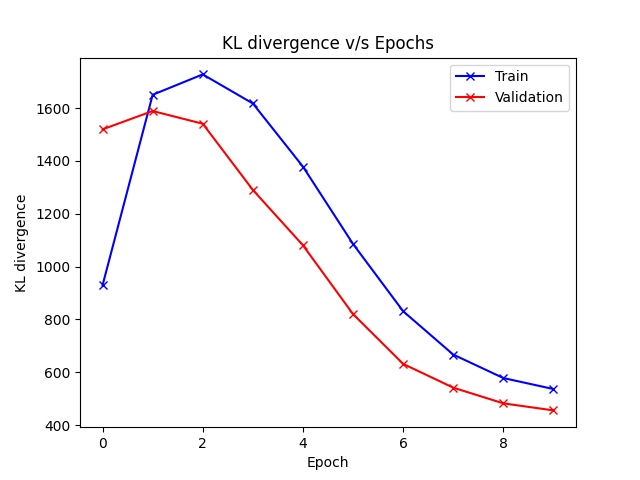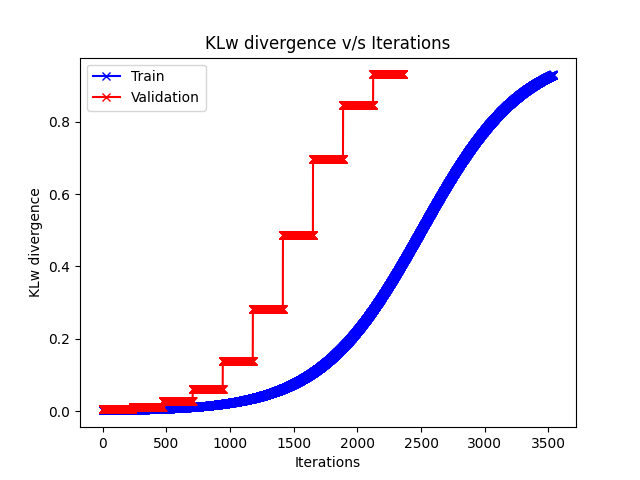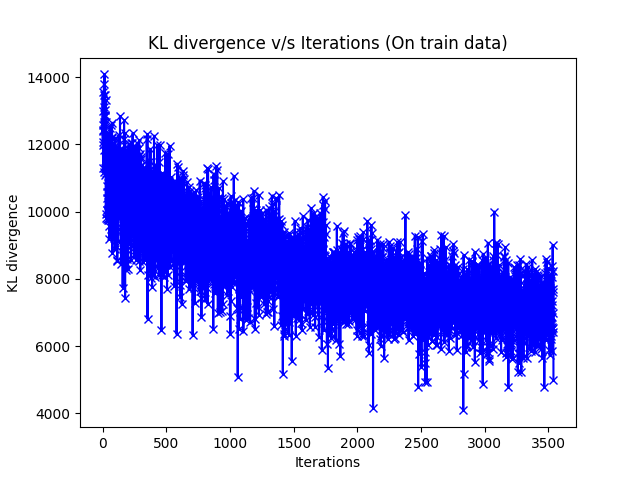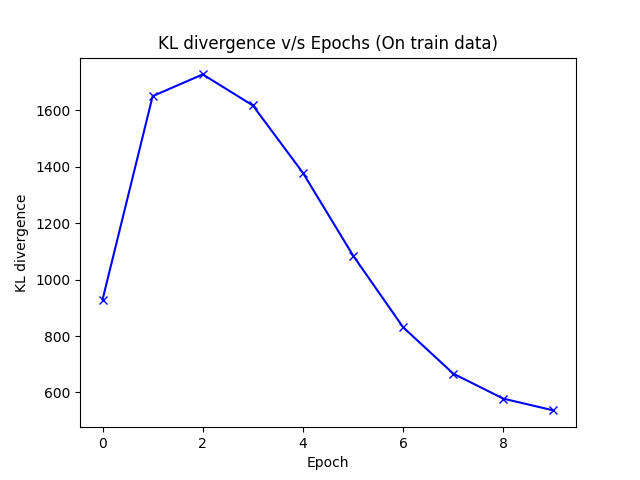

**Negative Log Likelihood NLL**

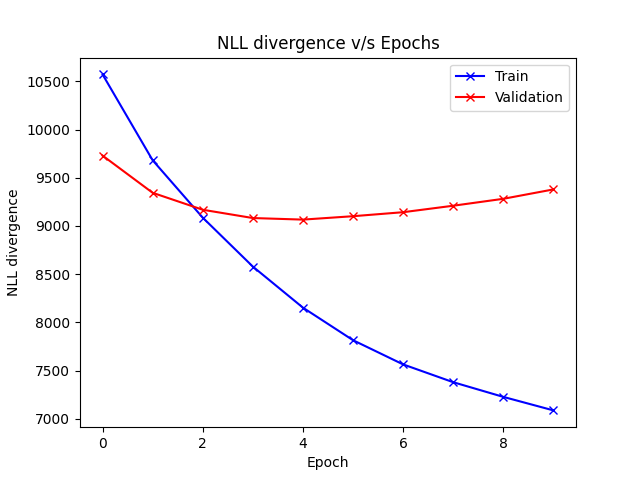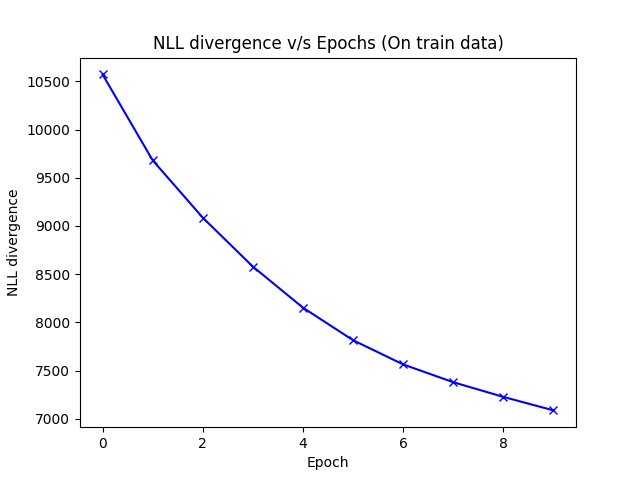

**ELBO Loss**

**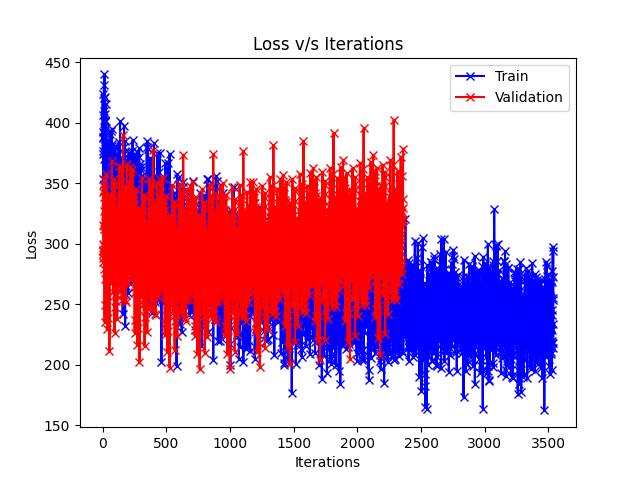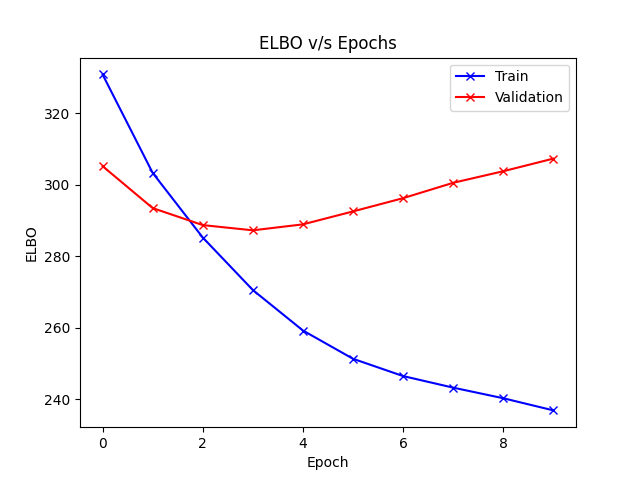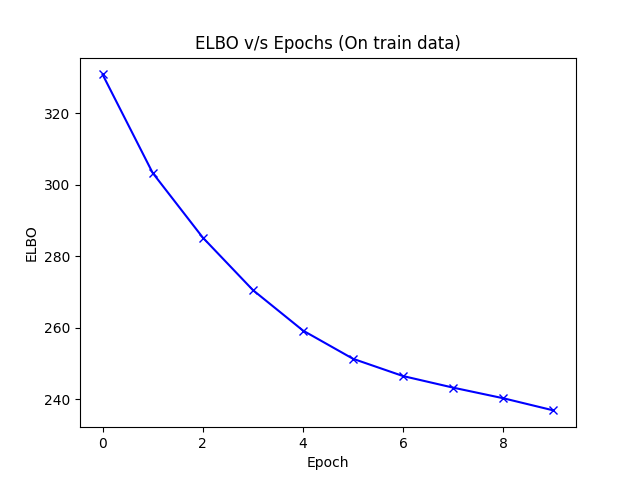**

In [ ]:
!python3 inference.py

Model loaded from /content/bin/2023-May-10-01:06:39/E4.pytorch
----------SAMPLES----------
anyone know anything else want know anything else want know anything else want know anything else want find anything else <eos>
also want see car called <unk> <unk> <unk> <unk> <unk> <unk> <unk> netcom com com nextmail com nextmail com nextmail com nextmail com nextmail com <eos>
people like see people like see <eos>
think need take advantage <eos>
would like one two week ago one two week ago <eos>
<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
yes yes thing like see difference time ago <unk> see difference time ago every day day ago used thier take advantage <eos>
well think much better way game run game run game run scored game run scored game ru

In [ ]:
!python3 inference.py

Model loaded from /content/bin/2023-May-10-01:06:39/E5.pytorch
----------SAMPLES----------
know source code may freely blare may freely blare may freely blare may freely blare may freely blare <eos>
well known new york year old fashioned year old fashioned year old fashioned year old fashioned year old fashioned year old fashioned year old <eos>
think good thing good thing good luck <eos>
think heard rumor <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
would like see explode point view <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
like list 

In [ ]:
!python3 train.py

SentenceVAE(
  (embedding): Embedding(34097, 300)
  (embedding_dropout): Dropout(p=0.5, inplace=False)
  (encoder_rnn): GRU(300, 256, batch_first=True)
  (decoder_rnn): GRU(300, 256, batch_first=True)
  (hidden2mean): Linear(in_features=256, out_features=16, bias=True)
  (hidden2logv): Linear(in_features=256, out_features=16, bias=True)
  (latent2hidden): Linear(in_features=16, out_features=256, bias=True)
  (outputs2vocab): Linear(in_features=256, out_features=34097, bias=True)
)
TRAIN Batch 0000/353, Loss  414.2352, NLL-Loss  414.2345, KL-Loss    0.4032, KL-Weight  0.002
TRAIN Batch 0050/353, Loss  360.3553, NLL-Loss  360.3464, KL-Loss    4.0739, KL-Weight  0.002
TRAIN Batch 0100/353, Loss  334.4120, NLL-Loss  334.3721, KL-Loss   16.1189, KL-Weight  0.002
TRAIN Batch 0150/353, Loss  361.0431, NLL-Loss  360.9644, KL-Loss   28.0780, KL-Weight  0.003
TRAIN Batch 0200/353, Loss  333.3917, NLL-Loss  333.2915, KL-Loss   31.5823, KL-Weight  0.003
TRAIN Batch 0250/353, Loss  336.8076, NLL-Lo

**Kullback–Leibler(KL) divergence loss with distribution linear**

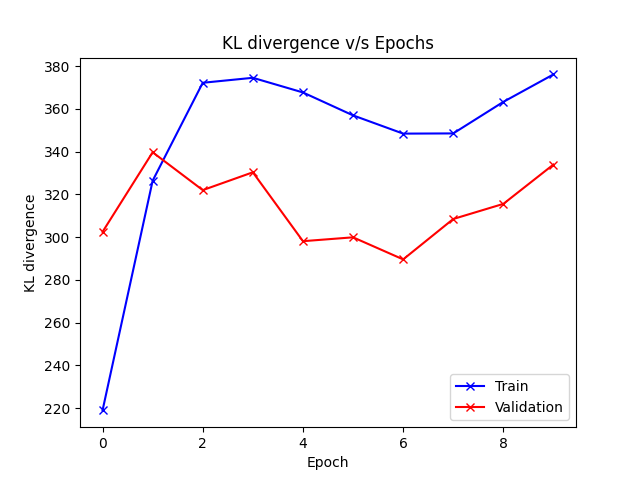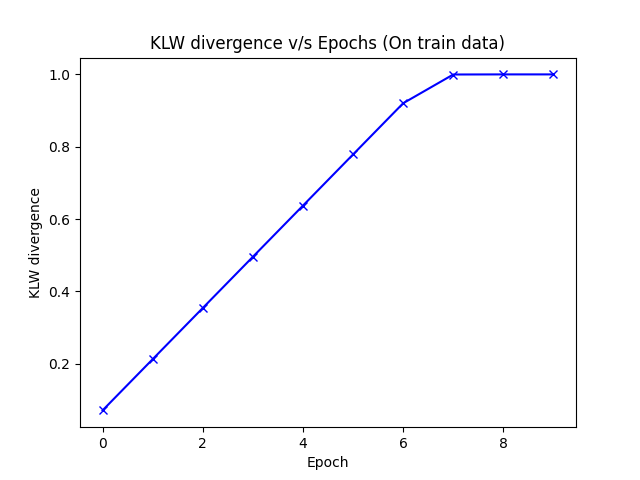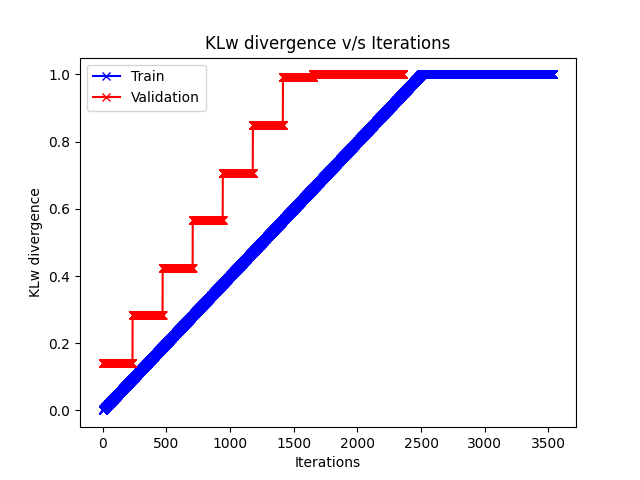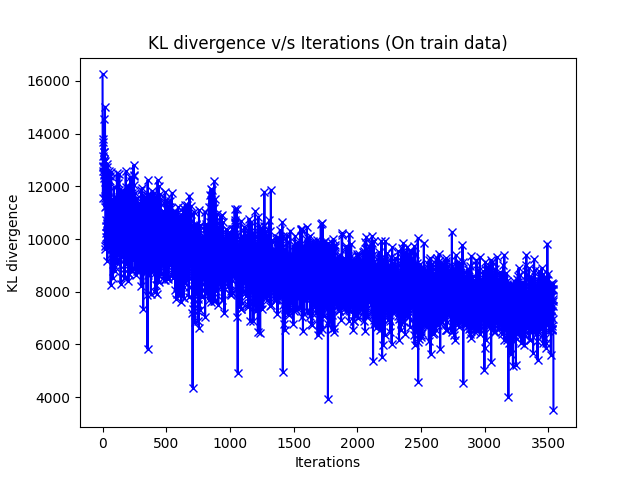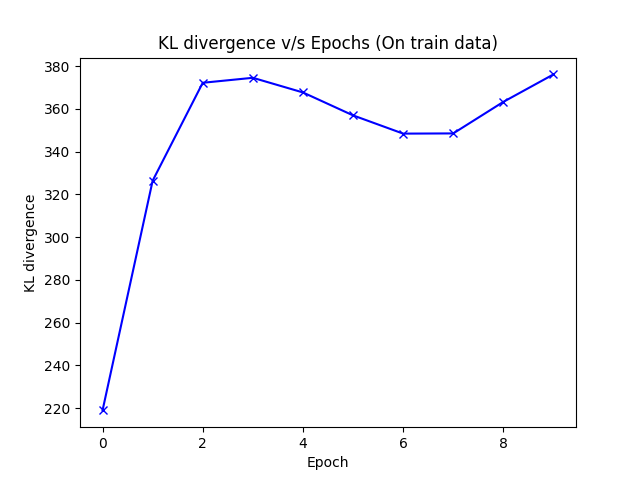

**NLL Loss**

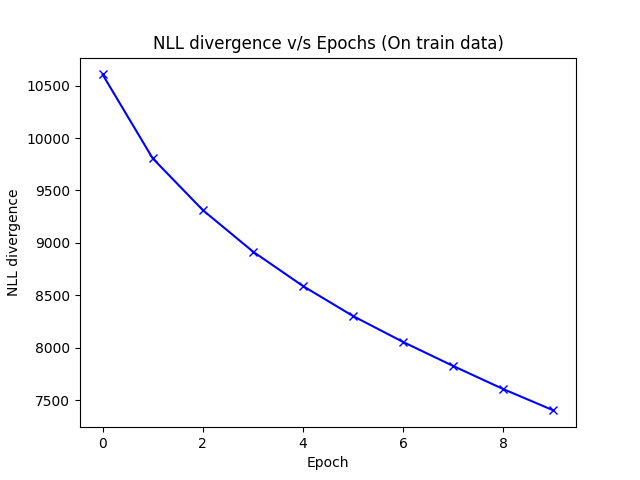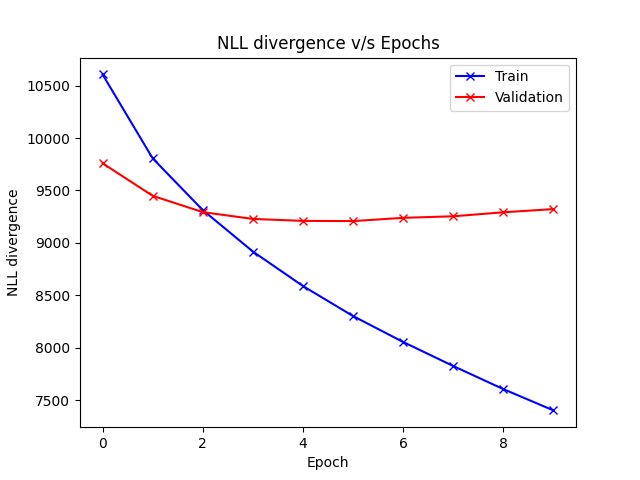

**ELBO Loss**

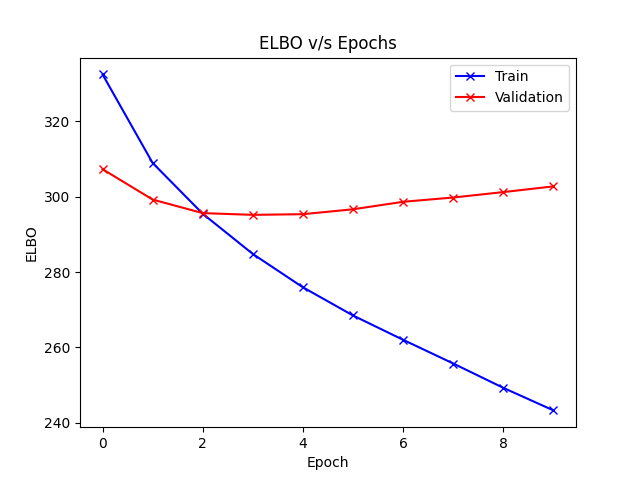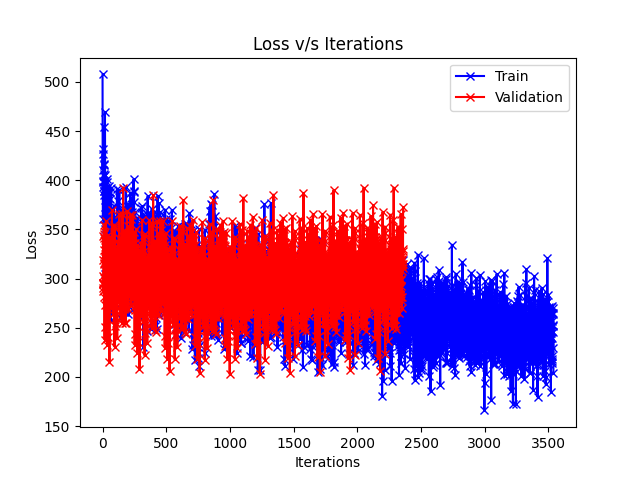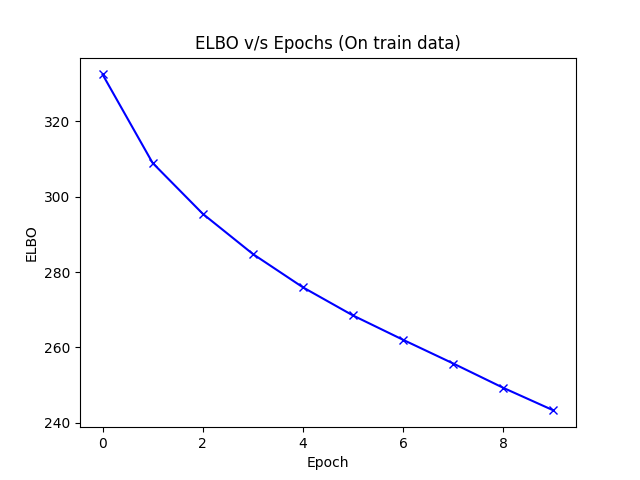

In [ ]:
!python3 inference.py

Model loaded from /content/bin/2023-May-10-00:34:23/E2.pytorch
----------SAMPLES----------
well know one time ago post post summary game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game game
<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <eos>
think think one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one one
<unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
well question one time

In [ ]:
!python3 inference.py

Model loaded from /content/bin/2023-May-10-00:34:23/E4.pytorch
----------SAMPLES----------
well team run scored run scored run scored run scored run scored run scored run scored run scored run scored run scored run scored run scored run scored run scored run scored run scored run scored run scored run scored run scored run scored run scored run scored run scored
well think would like one thing like one thing like one thing like one thing like one thing like one thing like one thing like vladimir one thing like vladimir one thing like vladimir <eos>
well <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
think think would like know one thing relates one thing relates one thing relates <eos>
would like know evidence evidence evidence evidence eviden

The resulting similarity_matrix will be a 1000x1000 matrix where each element (i,j) represents the cosine similarity between document i and document j. The diagonal elements (i,i) will be 1, since the cosine similarity between a document and itself is 1.